In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df1 = df.drop("User ID",axis = 'columns')
df1

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [4]:
from sklearn.preprocessing import LabelEncoder
df = df1.apply(LabelEncoder().fit_transform)
df

,Gender,Age,EstimatedSalary,Purchased
0,1,1,4,0
1,1,17,5,0
2,0,8,26,0
3,0,9,39,0
4,1,1,57,0
...,...,...,...,...
395,0,28,24,1
396,1,33,8,1
397,0,32,5,1
398,1,18,17,0


In [5]:
X = df.iloc[:,[1,2]]
Y = df.iloc[:,3]

In [6]:
X.head()

,Age,EstimatedSalary
0,1,4
1,17,5
2,8,26
3,9,39
4,1,57


In [7]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.25)

In [11]:
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [12]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

SVC()

In [13]:
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [14]:
model.score(x_test,y_test)

0.91

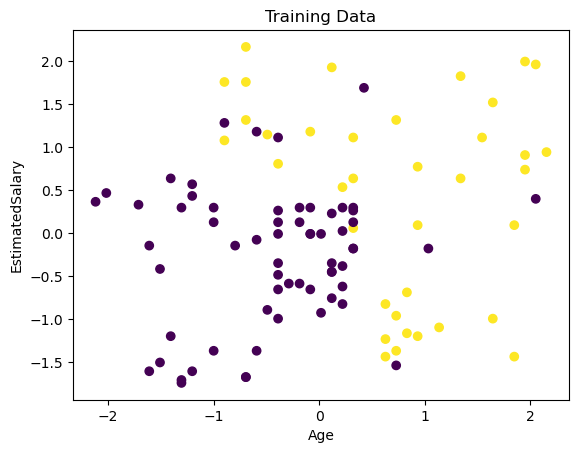

In [15]:
import matplotlib.pyplot as plt

plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Training Data')
plt.show()

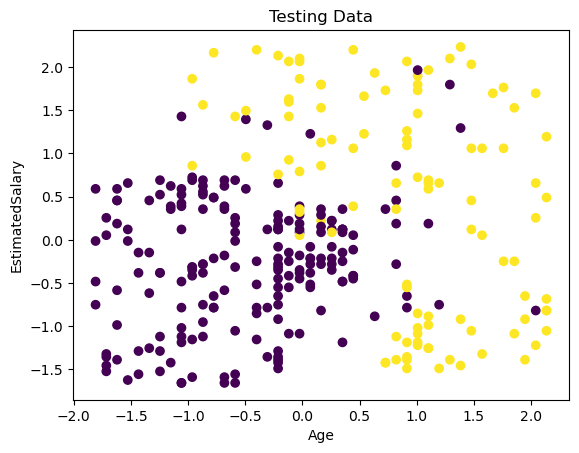

In [17]:
import matplotlib.pyplot as plt

plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Testing Data')
plt.show()

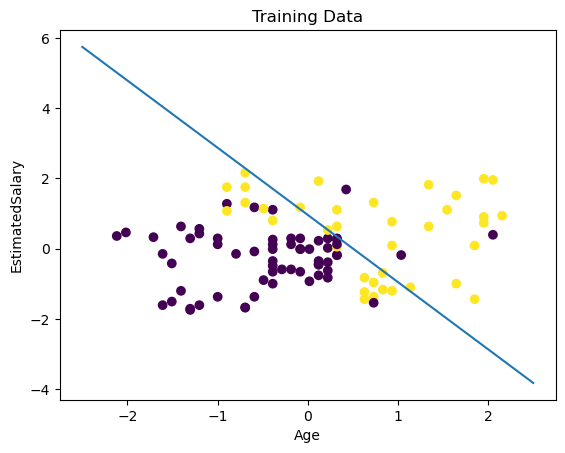

In [18]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x_train, y_train)

#scatter plot
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)

#create hyperplane
w = model.coef_[0]
#print(w[0])
#print(w[1])
a = -w[0]/w[1]
xx = np.linspace(-2.5,2.5)
yy = a* xx - (model.intercept_[0] / w[1])

#plotting hyperplane
plt.plot(xx,yy)        
#plt.axis("off"),plt.show()
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Training Data')
plt.show()

